In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Task 1

Данные:

In [2]:
urea = np.array([0, 3e-4, 5e-4, 1e-3, 2e-3, 3e-3, 5e-3])
mid_speed = np.array([0, 0.5, 0.77, 1.2, 1.57, 1.8, 1.9])
delta_speed = np.array([0, 0.05, 0.06, 0.08, 0.08, 0.09, 0.2])

График зависиомти скорости выделения аммиака от концентрации мочевины при её гидролизе:

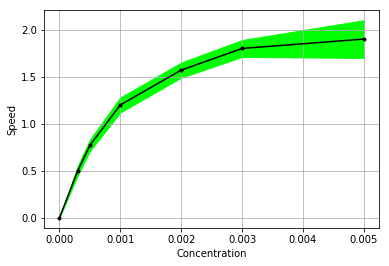

In [3]:
plt.plot(urea, mid_speed, "k.-")
plt.fill_between(urea, mid_speed - delta_speed, 
                 mid_speed + delta_speed, color="lime")
plt.xlabel("Concentration")
plt.ylabel("Speed")
plt.grid()
plt.show()

Воспользуемся графическим методом, будем считать, что $V_{max} = 2.5$

In [4]:
v_max = 2.5
for i, speed in enumerate(mid_speed):
    if speed * 2 > v_max:
        k_m = (urea[i] - urea[i - 1]) /\
              (mid_speed[i] - mid_speed[i - 1]) *\
              (v_max / 2 - mid_speed[i - 1]) + urea[i - 1]
        break
print("V_max = {}, K_m = {}".format(v_max, k_m))

V_max = 2.5, K_m = 0.0011351351351351353


Воспользуемся методом Лайнуивера-Берка:

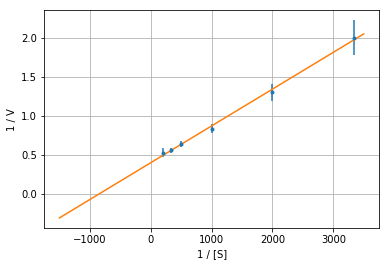

In [5]:
def trend_line(t, a, b):
    return a + b * t

a, b = curve_fit(lambda t, a, b: trend_line(t, a, b),  1 / urea[1:],
                 1 / mid_speed[1:])[0]
plt.errorbar(1 / urea[1:], 1 / mid_speed[1:], 
             yerr=1 / mid_speed[1:] - 1 /
             (mid_speed[1:] - delta_speed[1:]), fmt='.')
x = np.linspace(-1500, 3500, 100)
plt.plot(x, trend_line(x, a, b))
plt.grid()
plt.xlabel("1 / [S]")
plt.ylabel("1 / V")
plt.show()

In [6]:
v_max = 1 / a
k_m = np.tan(b) * v_max
print("V_max = {}, K_m = {}".format(v_max, k_m))

V_max = 2.5255933399123123, K_m = 0.001191429643433508


Метод Хайнса-Вульфа

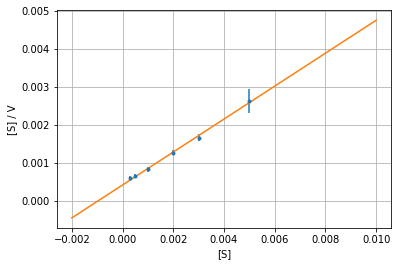

In [7]:
def trend_line(t, a, b):
    return a + b * t

a, b = curve_fit(lambda t, a, b: trend_line(t, a, b),  urea[1:],
                 urea[1:] / mid_speed[1:])[0]
plt.errorbar(urea[1:], urea[1:] / mid_speed[1:], 
             yerr=urea[1:] * (1 / mid_speed[1:] - 1 /
             (mid_speed[1:] - delta_speed[1:])), fmt='.')
x = np.linspace(-2e-3, 1e-2, 100)
plt.plot(x, trend_line(x, a, b))
plt.grid()
plt.xlabel("[S]")
plt.ylabel("[S] / V")
plt.show()

In [8]:
v_max = 1 / np.tan(b)
k_m = a * v_max
print("V_max = {}, K_m = {}".format(v_max, k_m))

V_max = 2.1620770451378992, K_m = 0.0009163156258956061


Метод Иди-Хофсти

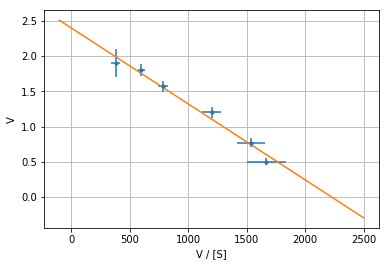

In [14]:
def trend_line(t, a, b):
    return a + b * t

a, b = curve_fit(lambda t, a, b: trend_line(t, a, b),  
                 mid_speed[1:] / urea[1:],
                 mid_speed[1:])[0]
plt.errorbar(mid_speed[1:] / urea[1:], mid_speed[1:],
             xerr=delta_speed[1:] / urea[1:], yerr=delta_speed[1:], fmt='.')
x = np.linspace(-100, 2500, 100)
plt.plot(x, trend_line(x, a, b))
plt.grid()
plt.xlabel("V / [S]")
plt.ylabel("V")
plt.show()

In [93]:
v_max = a
k_m = np.tan(-b)
print("V_max = {}, K_m = {}".format(v_max, k_m))

V_max = 2.3987609602757445, K_m = 0.0010779208757583896


Метод Эйзенталя и Корниш-Боудена.

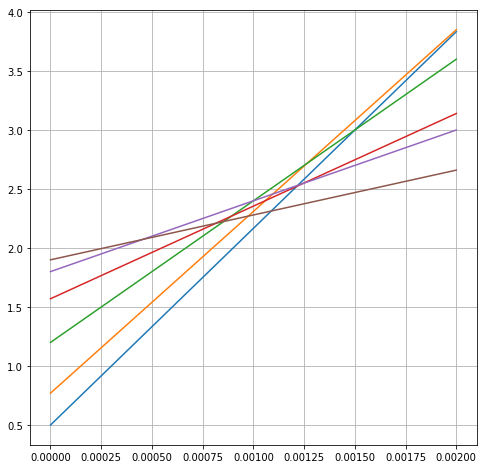

In [135]:
plt.figure(figsize=(8, 8))
for i in [1, 2, 3, 4, 5, 6]:
    x = np.array([0, 0.002])
    plt.plot(x, mid_speed[i] + mid_speed[i] / urea[i] * x)
plt.grid()
plt.show()

In [134]:
k_m = 0.122
v_max = 2.54
print("V_max = {}, K_m = {}".format(v_max, k_m))

V_max = 2.54, K_m = 0.122


# Task 2

In [148]:
s = np.array([0.3, 0.5, 1, 3, 9]) * 1e-5
speed0 = np.array([10.4, 14.5, 22.5, 33.8, 40.5])
speed1 = np.array([4.1, 6.4, 11.3, 22.6, 33.8])
speed2 = np.array([2.1, 2.9, 4.5, 6.8, 8.1])

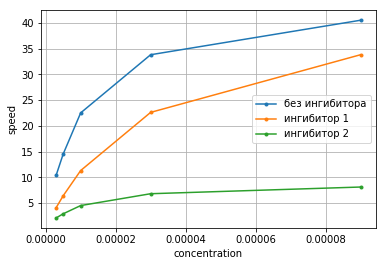

In [145]:
plt.plot(s, speed0, '.-', label="без ингибитора")
plt.plot(s, speed1, '.-', label="ингибитор 1")
plt.plot(s, speed2, '.-', label="ингибитор 2")
plt.xlabel("concentration")
plt.ylabel("speed")
plt.grid()
plt.legend()
plt.show()

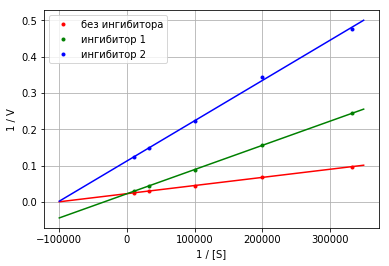

In [156]:
def trend_line(t, a, b):
    return a + b * t

a0, b0 = curve_fit(lambda t, a, b: trend_line(t, a, b),  1 / s,
                 1 / speed0)[0]
a1, b1 = curve_fit(lambda t, a, b: trend_line(t, a, b),  1 / s,
                 1 / speed1)[0]
a2, b2 = curve_fit(lambda t, a, b: trend_line(t, a, b),  1 / s,
                 1 / speed2)[0]
plt.plot(1 / s, 1 / speed0, 'r.', label="без ингибитора")
plt.plot(1 / s, 1 / speed1, 'g.', label="ингибитор 1")
plt.plot(1 / s, 1 / speed2, 'b.', label="ингибитор 2")
x = np.linspace(-100000, 350000, 100)
plt.plot(x, a0 + x * b0, 'r-')
plt.plot(x, a1 + x * b1, 'g-')
plt.plot(x, a2 + x * b2, 'b-')
plt.grid()
plt.xlabel("1 / [S]")
plt.ylabel("1 / V")
plt.legend()
plt.show()

In [154]:
v_max = 1 / a0
k_m = np.tan(b0) * v_max
print("без ингибитора V_max = {}, K_m = {}".format(v_max, k_m))
v_max = 1 / a1
k_m = np.tan(b1) * v_max
print("ингибитор 1 V_max = {}, K_m = {}".format(v_max, k_m))
v_max = 1 / a2
k_m = np.tan(b2) * v_max
print("ингибитор 2 V_max = {}, K_m = {}".format(v_max, k_m))

без ингибитора V_max = 44.63223264295634, K_m = 9.99709866268688e-06
ингибитор 1 V_max = 45.10599062667904, K_m = 3.005600135672463e-05
ингибитор 2 V_max = 8.888276648774246, K_m = 9.851349648404222e-06
